# Movie Correlation Analysis
By Aniruddh Tripathi  
This project explores correlations in movie data using Python, focusing on budget, gross earnings, and other features.  
Key finding: Budget and gross revenue are strongly correlated (around 0.7).

In [1]:
# import libraries....
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots we will create..


## Data Loading and Cleaning
Load the movie dataset and handle missing values, data types, and inconsistencies.

In [2]:
# Read in the data
df = pd.read_csv('movies.csv')
df.head()
# df.info()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Lets explore if there is missing data
colshavingmissingdata = []
for col in df.columns:
    if df[col].isnull().any() == True:
        #print(col)
        colshavingmissingdata.append(col)
# colshavingmissingdata


In [4]:
# for percent of missing data -> really not needed...

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col , pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
# filling all the NaN values in df with the next values...
df1 = df.fillna(method = 'ffill')
df1.isna()

/tmp/ipython-input-5-2656899552.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1 = df.fillna(method = 'ffill')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7664,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7665,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7666,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# Datatypes of our columns
df1.dtypes

,0
name,object
rating,object
genre,object
year,int64
released,object
score,float64
votes,float64
director,object
writer,object
star,object


In [7]:
# changing data types of the columns...
def new_col(df, col_name , datatype = 'int64'):
    df[col_name] = df[col_name].astype(datatype)
    return df[col_name]

df1['budget'] = new_col(df1 , 'budget')
df1['gross'] = new_col(df1 , 'gross')
df1['runtime'] = new_col(df1 , 'runtime')
df1['votes'] = new_col(df1 , 'votes')

# df1.head()

In [8]:
# fixing the year and release year as it should be same for all the entries.....
# creating new column -> correct year
new = df1['released'].str.split(',' , n = 1 , expand = True)
df1['correctyear'] = new[1].astype(str).str[1:5]
df1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [9]:
# ordering data by gross..
df1 = df1.sort_values(by = ['gross'], inplace = False , ascending = False)


In [10]:
# showing the whole dataframe as an output...
pd.set_option('display.max_rows', None)

In [11]:
# Drop any duplicates..
df1['company'].drop_duplicates().sort_values(ascending = False)

,company
7129,thefyzz
5664,micro_scope
6412,iDeal Partners Film Fund
4007,i5 Films
6793,i am OTHER
6420,erbp
3776,double A Films
524,Zupnik-Curtis Enterprises
3330,Zucker Brothers Productions
520,Zoetrope Studios


In [12]:
# budget high correlation
# company high correlation
# votes high correlation
# scores high correlation

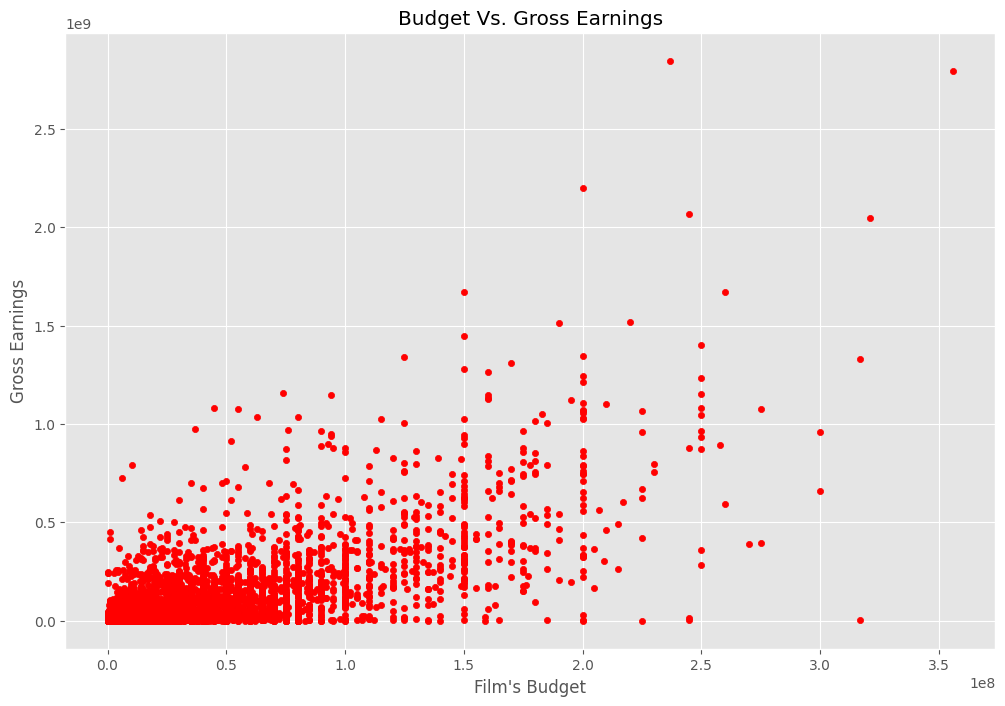

In [13]:
# Scatter plot with budget vs gross
df1.plot.scatter(x = 'budget' , y = 'gross' , c = 'r')
plt.title('Budget Vs. Gross Earnings')
plt.xlabel("Film's Budget")
plt.ylabel('Gross Earnings')
plt.show()

In [14]:
df1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


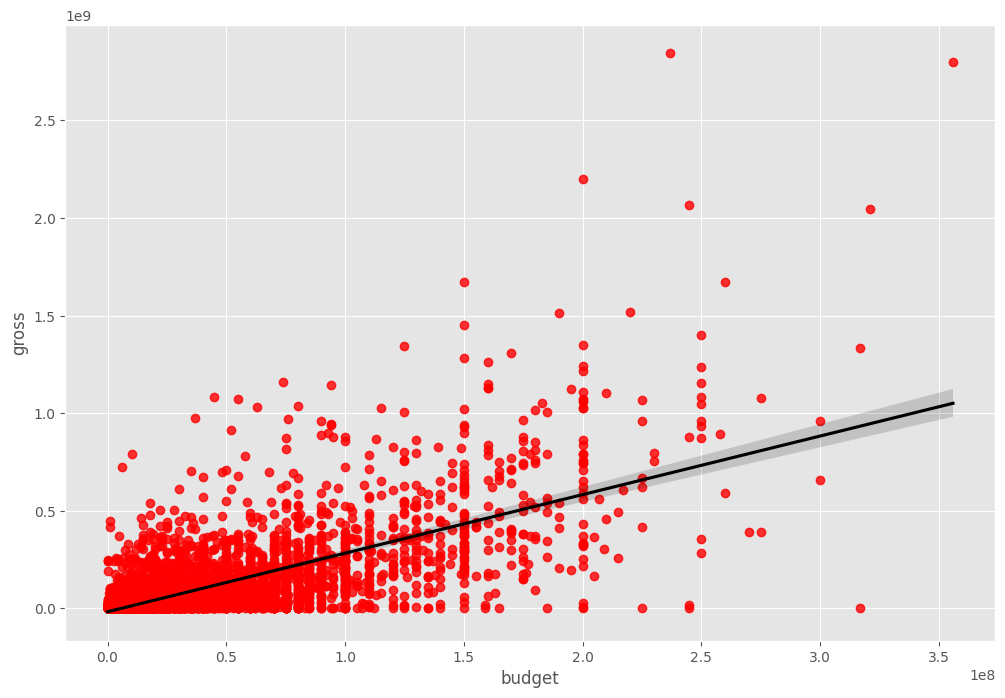

In [15]:
# plot budget vs gross using seaborn
sns.regplot(x = 'budget' , y = 'gross', data = df1, scatter_kws={'color':'red'} , line_kws={'color':'black'})
plt.show()

## Correlation Analysis
Explore relationships between numeric features like budget and gross, using Pearson and Kendall correlations.

In [16]:
# Select only numeric columns for correlation to avoid string conversion errors
df1_numeric = df1.select_dtypes(include=['float64', 'int64'])

In [17]:
# Calculate correlations for numeric columns
corr_matrix = df1_numeric.corr()  # Store result for later use
corr_matrix  # Display the matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.098098,0.222427,0.334314,0.261550,0.120694
score,0.098098,1.000000,0.409064,0.080708,0.186264,0.399116
votes,0.222427,0.409064,1.000000,0.449422,0.632341,0.309140
budget,0.334314,0.080708,0.449422,1.000000,0.701819,0.263424
gross,0.261550,0.186264,0.632341,0.701819,1.000000,0.245443
runtime,0.120694,0.399116,0.309140,0.263424,0.245443,1.000000


In [18]:
# Calculate Kendall correlations for numeric columns
kendall_corr = df1_numeric.corr(method='kendall')
kendall_corr  # Display the matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.067724,0.330410,0.239054,0.206176,0.097144
score,0.067724,1.000000,0.299756,0.023015,0.088740,0.283102
votes,0.330410,0.299756,1.000000,0.359133,0.549760,0.198226
budget,0.239054,0.023015,0.359133,1.000000,0.423210,0.194368
gross,0.206176,0.088740,0.549760,0.423210,1.000000,0.173083
runtime,0.097144,0.283102,0.198226,0.194368,0.173083,1.000000


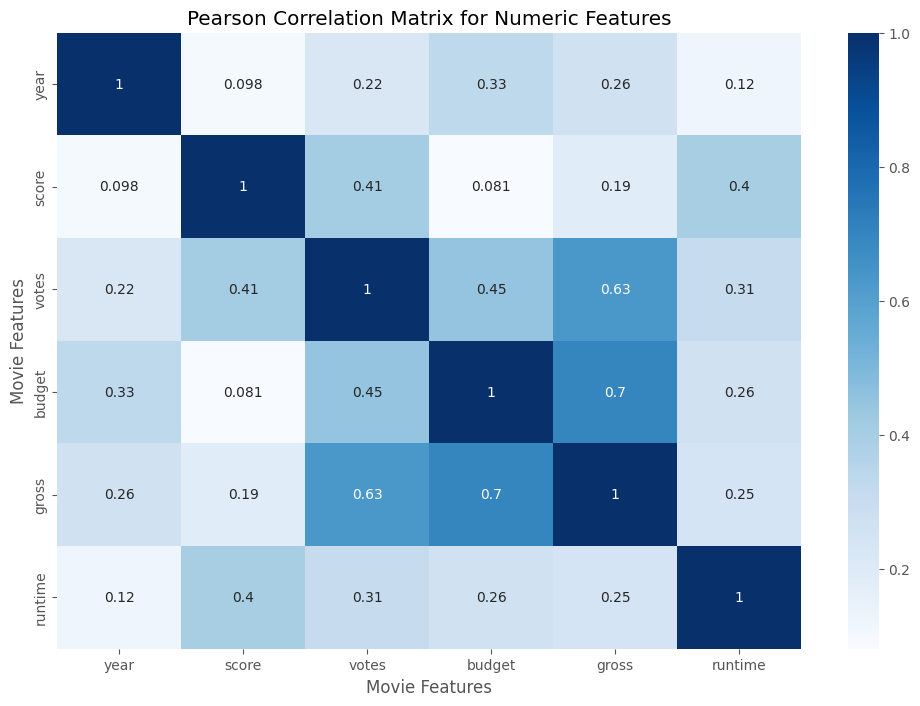

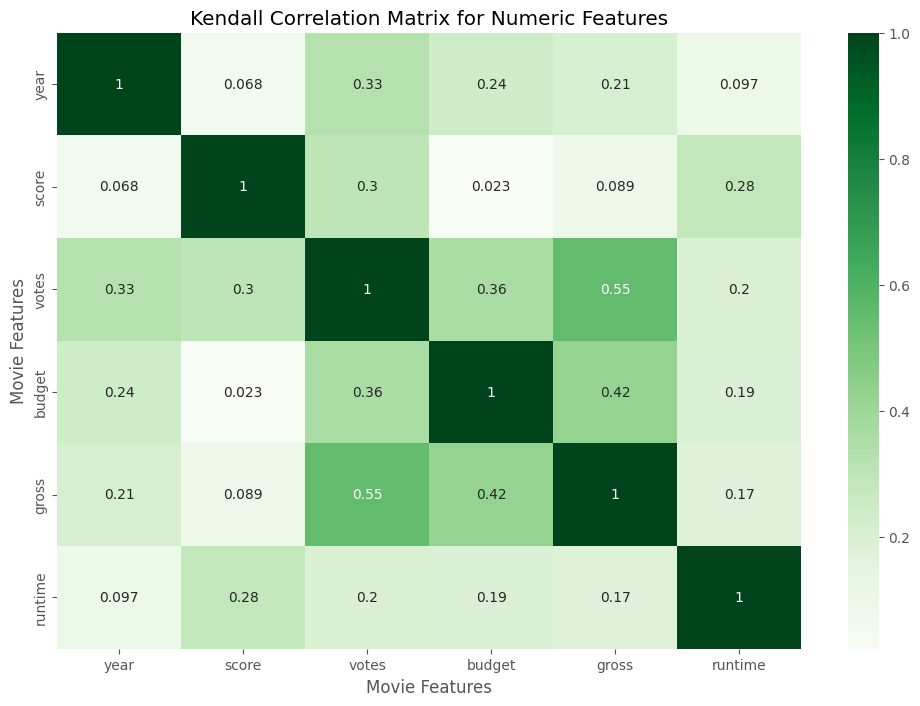

In [19]:
# Visualize Pearson correlation for numeric features
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Pearson Correlation Matrix for Numeric Features')
plt.xlabel("Movie Features")
plt.ylabel('Movie Features')
plt.savefig('heatmap_pearson.png')  # Save for portfolio
plt.show()

# Visualize Kendall correlation for numeric features
sns.heatmap(kendall_corr, annot=True, cmap='Greens')
plt.title('Kendall Correlation Matrix for Numeric Features')
plt.xlabel("Movie Features")
plt.ylabel('Movie Features')
plt.savefig('heatmap_kendall.png')  # Save for portfolio
plt.show()

In [20]:
# looks at company as it is not numeric...
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7668 entries, 5445 to 3203
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         7668 non-null   object 
 1   rating       7668 non-null   object 
 2   genre        7668 non-null   object 
 3   year         7668 non-null   int64  
 4   released     7668 non-null   object 
 5   score        7668 non-null   float64
 6   votes        7668 non-null   int64  
 7   director     7668 non-null   object 
 8   writer       7668 non-null   object 
 9   star         7668 non-null   object 
 10  country      7668 non-null   object 
 11  budget       7668 non-null   int64  
 12  gross        7668 non-null   int64  
 13  company      7668 non-null   object 
 14  runtime      7668 non-null   int64  
 15  correctyear  7668 non-null   object 
dtypes: float64(1), int64(5), object(10)
memory usage: 1018.4+ KB


## Extended Correlation with Numerized Features
Convert categorical features (e.g., company, genre) to numeric codes for a broader correlation analysis.

In [21]:
# we're gonna assign a number to the corresponding company name. But it's better to convert all into numeric at the same time...
df1_numerized = df1
for col_name in df1_numerized.columns:
    if df1_numerized[col_name].dtype == 'object':
       df1_numerized[col_name] =  df1_numerized[col_name].astype('category')
       df1_numerized[col_name] = df1_numerized[col_name].cat.codes

df1_numerized.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162,29
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181,39
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194,17
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138,35
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149,38


In [22]:
# ordering data by gross..
df = df.fillna(method = 'ffill')
df = df.sort_values(by = ['gross'], inplace = False , ascending = False)
df.head()

/tmp/ipython-input-22-1005234901.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method = 'ffill')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


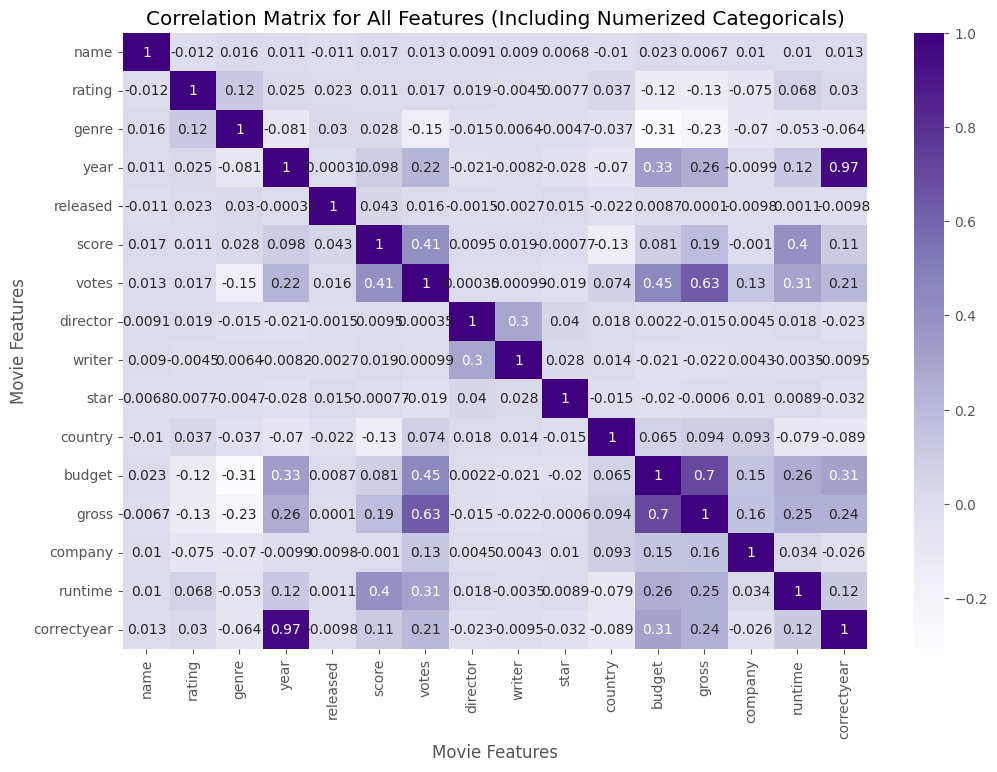

In [24]:
correlation_matrix = df1_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='Purples')
plt.title('Correlation Matrix for All Features (Including Numerized Categoricals)')
plt.xlabel("Movie Features")
plt.ylabel('Movie Features')
plt.savefig('heatmap_numerized.png')  # Save for portfolio
plt.show()

In [38]:
print("Original genres in df:")
print(df['genre'].value_counts())
print("\nGenres in df1:")
print(df1['genre'].value_counts())

Original genres in df:
genre
Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Sci-Fi         10
Romance        10
Western         3
Musical         2
History         1
Sport           1
Music           1
Name: count, dtype: int64

Genres in df1:
genre
4     2245
0     1705
6     1518
5      551
3      443
1      427
2      338
10     322
8       44
13      20
17      16
7       11
15      10
14      10
18       3
12       2
9        1
16       1
11       1
Name: count, dtype: int64


In [37]:
# Inspect genre_gross data
genre_gross = df1.groupby('genre')['gross'].mean().sort_values(ascending=False)
print("Genre Gross Revenue (Mean):")
print(genre_gross)
print("\nGross Data Type:")
print(df1['gross'].dtype)

Genre Gross Revenue (Mean):
genre
2     2.371341e+08
7     1.961725e+08
0     1.428912e+08
1     1.076143e+08
13    1.011835e+08
3     4.737666e+07
10    4.545384e+07
4     4.349299e+07
5     3.962173e+07
6     3.796836e+07
8     3.793855e+07
17    3.653404e+07
15    2.794645e+07
14    1.904249e+07
18    1.067530e+07
9     6.666725e+06
12    2.595346e+06
16    1.067629e+06
11    1.100140e+05
Name: gross, dtype: float64

Gross Data Type:
int64


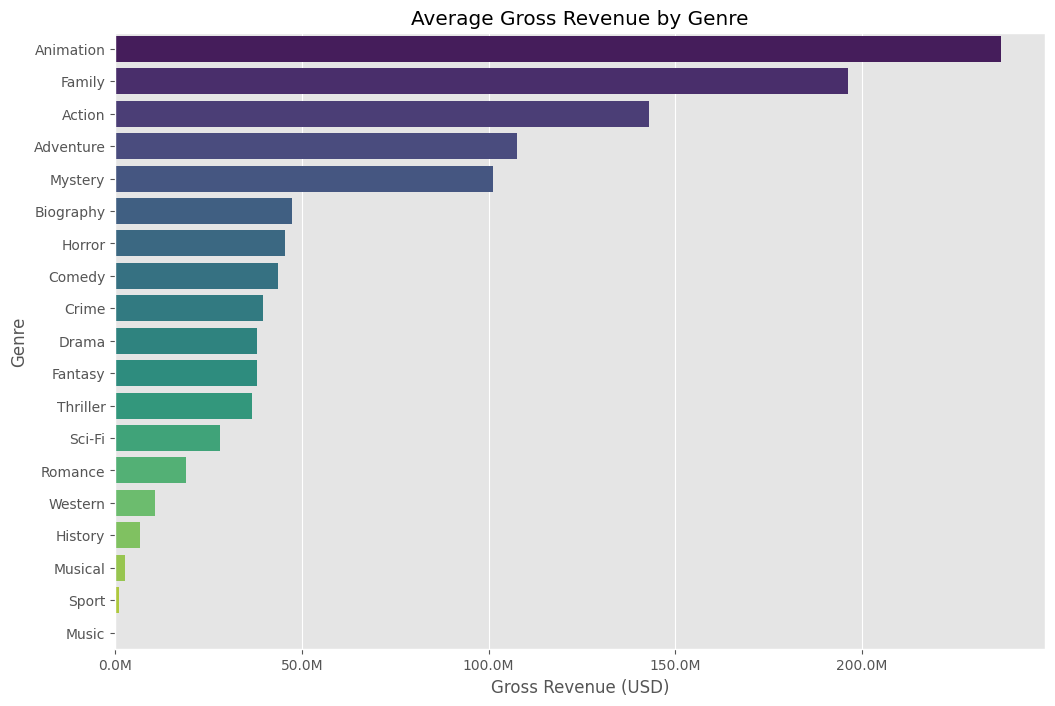

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define genre mapping
genre_mapping = {
    4: 'Comedy', 0: 'Action', 6: 'Drama', 5: 'Crime', 3: 'Biography',
    1: 'Adventure', 2: 'Animation', 10: 'Horror', 8: 'Fantasy', 13: 'Mystery',
    17: 'Thriller', 7: 'Family', 15: 'Sci-Fi', 14: 'Romance', 18: 'Western',
    12: 'Musical', 9: 'History', 16: 'Sport', 11: 'Music'
}

# Calculate average gross revenue by genre
genre_gross = df1.groupby('genre')['gross'].mean().sort_values(ascending=False)
# Map numeric genres to names
genre_gross.index = genre_gross.index.map(genre_mapping)

plt.figure(figsize=(12,8))
ax = sns.barplot(x=genre_gross.values, y=genre_gross.index, palette='viridis')
plt.title('Average Gross Revenue by Genre')
plt.xlabel('Gross Revenue (USD)')
plt.ylabel('Genre')

# Formatter: show in millions
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
ax.xaxis.set_major_formatter(formatter)

plt.savefig('genre_gross.png')
plt.show()

In [25]:
pd.set_option('display.max_rows' , None)

In [26]:
# Now we'll organize the highest correlations in the top most of correlation table...
# We're gonna use something called unstacking...
corr_matrix = df1_numerized.corr()
corr_pairs = corr_matrix.unstack()
corr_pairs

name         name           1.000000
             rating        -0.011776
             genre          0.016355
             year           0.011453
             released      -0.010758
             score          0.017237
             votes          0.013038
             director       0.009079
             writer         0.009033
             star           0.006820
             country       -0.010127
             budget         0.022882
             gross          0.006747
             company        0.009980
             runtime        0.010448
             correctyear    0.012603
rating       name          -0.011776
             rating         1.000000
             genre          0.116837
             year           0.025051
             released       0.022667
             score          0.011389
             votes          0.016909
             director       0.018842
             writer        -0.004470
             star           0.007728
             country        0.036900
             budget        -0.117510
             gross         -0.126848
             company       -0.075280
             runtime        0.068470
             correctyear    0.029516
genre        name           0.016355
             rating         0.116837
             genre          1.000000
             year          -0.081261
             released       0.030186
             score          0.027832
             votes         -0.145296
             director      -0.015258
             writer         0.006434
             star          -0.004696
             country       -0.036506
             budget        -0.308228
             gross         -0.232776
             company       -0.070347
             runtime       -0.052806
             correctyear   -0.063767
year         name           0.011453
             rating         0.025051
             genre         -0.081261
             year           1.000000
             released      -0.000307
             score          0.098098
             votes          0.222427
             director      -0.020795
             writer        -0.008240
             star          -0.027871
             country       -0.069859
             budget         0.334314
             gross          0.261550
             company       -0.009918
             runtime        0.120694
             correctyear    0.967588
released     name          -0.010758
             rating         0.022667
             genre          0.030186
             year          -0.000307
             released       1.000000
             score          0.042573
             votes          0.015920
             director      -0.001547
             writer        -0.002683
             star           0.015067
             country       -0.021963
             budget         0.008749
             gross          0.000103
             company       -0.009826
             runtime        0.001051
             correctyear   -0.009775
score        name           0.017237
             rating         0.011389
             genre          0.027832
             year           0.098098
             released       0.042573
             score          1.000000
             votes          0.409064
             director       0.009509
             writer         0.019214
             star          -0.000772
             country       -0.134361
             budget         0.080708
             gross          0.186264
             company       -0.001013
             runtime        0.399116
             correctyear    0.107532
votes        name           0.013038
             rating         0.016909
             genre         -0.145296
             year           0.222427
             released       0.015920
             score          0.409064
             votes          1.000000
             director       0.000349
             writer         0.000993
             star          -0.019364
             country        0.073612
             budget         0.449422
    

In [27]:
# Sorting the unstacked correlation matrix..
sorted_corr_pair = corr_pairs.sort_values(ascending= False)
sorted_corr_pair

,,0
name,name,1.000000
rating,rating,1.000000
year,year,1.000000
genre,genre,1.000000
votes,votes,1.000000
director,director,1.000000
score,score,1.000000
released,released,1.000000
gross,gross,1.000000
company,company,1.000000


In [28]:
# Extracting out only the highly correlated pairs..
high_corr_pairs = corr_pairs[corr_pairs > 0.5]
high_corr_pairs


name         name           1.000000
rating       rating         1.000000
genre        genre          1.000000
year         year           1.000000
             correctyear    0.967588
released     released       1.000000
score        score          1.000000
votes        votes          1.000000
             gross          0.632341
director     director       1.000000
writer       writer         1.000000
star         star           1.000000
country      country        1.000000
budget       budget         1.000000
             gross          0.701819
gross        votes          0.632341
             budget         0.701819
             gross          1.000000
company      company        1.000000
runtime      runtime        1.000000
correctyear  year           0.967588
             correctyear    1.000000
dtype: float64

In [29]:
# hence, Budget and gross have the highest correlation which we can really use in further steps of data analysis...
# Company has lower correlation, we're wrong...